In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import praw

# Credentials
client_id='oi5jJHdVLnmDy5Bwzupswg'
client_secret='c5gmxo_oaiFrzxMex9KlJ7fLXVjj8w'
username='SirDanceALot42069'
password='Oppenheimer@45'
user_agent="my user agent"

reddit = praw.Reddit(client_id= client_id,
     client_secret=client_secret,
     username=username,
     password=password,
     user_agent=user_agent
)

In [ ]:
import pandas as pd

min_upvotes=10
min_comments=10


subreddit_names={'economics','economy', 'globalmarkets'}

posts = []
for subreddit_name in subreddit_names:
      for submission in reddit.subreddit(subreddit_name).hot(limit=30):
            if submission.score >= min_upvotes and submission.num_comments >= min_comments:
                post_data = {
                    'Title': submission.title,
                    'Upvotes': submission.score,
                    'Comment': [],
                    'Upvotes_Comments': submission.upvote_ratio
                }

                submission.comments.replace_more(limit=10)
                for comment in submission.comments.list():
                    comment_data = {
                        'Title': submission.title,
                        'Upvotes': submission.score,
                        'Comment': comment.body,  # Change 'Comments' to 'Comment'
                        'Upvotes_Comments': submission.upvote_ratio
                    }
                    posts.append(comment_data)

df = pd.DataFrame(posts)

df.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,Title,Upvotes,Comment,Upvotes_Comments
0,Dave Ramsey show isn't financial advice: it's ...,339,Here is the part you are missing most people w...,0.89
1,Dave Ramsey show isn't financial advice: it's ...,339,It's bootcanp for financially illiterate peopl...,0.89
2,Dave Ramsey show isn't financial advice: it's ...,339,I am no fan of Dave Ramsey and most his advice...,0.89
3,Dave Ramsey show isn't financial advice: it's ...,339,"if you want misery porn, look up Caleb hammer ...",0.89
4,Dave Ramsey show isn't financial advice: it's ...,339,I dont think its really misery porn as intende...,0.89


In [ ]:
print(len(df.index))
df.head()

3503


,Title,Upvotes,Comment,Upvotes_Comments
0,Dave Ramsey show isn't financial advice: it's ...,339,Here is the part you are missing most people w...,0.89
1,Dave Ramsey show isn't financial advice: it's ...,339,It's bootcanp for financially illiterate peopl...,0.89
2,Dave Ramsey show isn't financial advice: it's ...,339,I am no fan of Dave Ramsey and most his advice...,0.89
3,Dave Ramsey show isn't financial advice: it's ...,339,"if you want misery porn, look up Caleb hammer ...",0.89
4,Dave Ramsey show isn't financial advice: it's ...,339,I dont think its really misery porn as intende...,0.89


In [ ]:
!pip install pandas nltk


In [ ]:
comments_df = df['Comment']
post_df = df['Title']

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    return tokens

# Apply preprocessing to comments
preprocessed_comments = comments_df.apply(preprocess_text)
preprocessed_posts = post_df.apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import Counter

economics_keywords = [
    'economics',
    'supply and demand',
    'inflation',
    'deflation',
    'monetary policy',
    'fiscal policy',
    'gross domestic product (gdp)',
    'market',
    'trade',
    'unemployment',
    'interest rates',
    'exchange rates',
    'consumer price index (cpi)',
    'producer price index (ppi)',
    'balance of trade',
    'gross national product (gnp)',
    'recession',
    'depression',
    'budget deficit',
    'national debt',
    'capitalism',
    'socialism',
    'labor market',
    'economic growth',
    'economic development',
    'taxation',
    'government spending',
    'public debt',
    'demand curve',
    'supply curve'
]

# Convert all terms to lowercase
economics_keywords = [keyword.lower() for keyword in economics_keywords]

keyword_counts = {keyword: 0 for keyword in economics_keywords}



for comment in comments_df:
    for keyword in economics_keywords:
        if keyword in comment:
            keyword_counts[keyword] += 1

for comment in post_df:
    for keyword in economics_keywords:
        if keyword in comment:
            keyword_counts[keyword] += 1

In [ ]:
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

keyword_df=pd.DataFrame(sorted_keywords)
keyword_df.head()
# Print the most mentioned keywords and their counts
for keyword, count in sorted_keywords:
    print(f'{keyword}: {count} mentions')


keyword_df.head()

csv_file_path = '/content/sample_data/keyword_mentions.csv'

# Write the DataFrame to a CSV file
keyword_df.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column

print(f'DataFrame has been written to {csv_file_path}')


inflation: 531 mentions
market: 201 mentions
unemployment: 46 mentions
recession: 45 mentions
interest rates: 41 mentions
economics: 39 mentions
monetary policy: 36 mentions
trade: 27 mentions
capitalism: 27 mentions
supply and demand: 14 mentions
labor market: 12 mentions
deflation: 9 mentions
depression: 8 mentions
economic growth: 5 mentions
socialism: 3 mentions
taxation: 2 mentions
demand curve: 2 mentions
government spending: 1 mentions
fiscal policy: 0 mentions
gross domestic product (gdp): 0 mentions
exchange rates: 0 mentions
consumer price index (cpi): 0 mentions
producer price index (ppi): 0 mentions
balance of trade: 0 mentions
gross national product (gnp): 0 mentions
budget deficit: 0 mentions
national debt: 0 mentions
economic development: 0 mentions
public debt: 0 mentions
supply curve: 0 mentions
DataFrame has been written to /content/sample_data/keyword_mentions.csv


In [ ]:
import pandas as pd
import string



# Preprocess the text and find associated keywords for each comment
def preprocess_and_find_keywords(text):
    # Remove punctuation, convert to lowercase, and split into words
    words = text.translate(str.maketrans('', '', string.punctuation)).lower().split()

    # Find keywords in the comment
    comment_keywords = [keyword for keyword in economics_keywords if keyword in words]

    # Return the comment and associated keywords
    return ' '.join(comment_keywords)

# Apply the preprocess_and_find_keywords function to the 'comments' column
df['associated_keywords'] = df['Comment'].apply(preprocess_and_find_keywords)
df['associated_keywords'] = df['Title'].apply(preprocess_and_find_keywords)


In [ ]:
df_file_path="/content/sample_data/Data.csv"
df.to_csv(df_file_path, index=False)  # Set index=False to exclude the index column

print(f'DataFrame has been written to {csv_file_path}')
df=df[df['associated_keywords']!='']
new_columns=['Title', 'Comment',
       'associated_keywords']
df=df[new_columns]
df.head()



DataFrame has been written to /content/sample_data/keyword_mentions.csv


,Title,Comment,associated_keywords
200,"Wonking Out: Time, Memory and Inflation. Almos...",Wages have been stagnating for decades and Ame...,inflation
201,"Wonking Out: Time, Memory and Inflation. Almos...",Because the economy isn't equitably benefitti...,inflation
202,"Wonking Out: Time, Memory and Inflation. Almos...",The why is pretty straightforward: Americans h...,inflation
203,"Wonking Out: Time, Memory and Inflation. Almos...","Not even fucking close.\n\n""Let them eat cake""",inflation
204,"Wonking Out: Time, Memory and Inflation. Almos...",Have been to a goddamn grocery store this deca...,inflation


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Combine 'Title' and 'Comment' into a single text column
df['text'] = df['Title'] + ' ' + df['Comment']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Perform K-Means clustering (adjust the number of clusters as needed)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Add a new column 'Cluster' to your DataFrame with cluster labels
df['Cluster'] = kmeans.labels_

df.head()
# Group comments by cluster and print associated keywords for each cluster
for cluster_id in range(num_clusters):
    cluster_comments = df[df['Cluster'] == cluster_id]

df.head()

csv_file_path = '/content/sample_data/Final.csv'

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column

print(f'DataFrame has been written to {csv_file_path}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DataFrame has been written to /content/sample_data/Final.csv


In [ ]:
# Create an empty DataFrame to store the counts
keyword_counts_df = pd.DataFrame(columns=['Cluster'] + economics_keywords)

# Iterate through each cluster
for cluster_id in range(num_clusters):
    cluster_comments = df[df['Cluster'] == cluster_id]

    # Initialize the counts dictionary for this cluster
    cluster_keyword_counts = {'Cluster': cluster_id}

    # Count the occurrences of each associated keyword in this cluster
    for keyword in economics_keywords:
        keyword_count = cluster_comments['associated_keywords'].str.count(keyword).sum()
        cluster_keyword_counts[keyword] = keyword_count

    # Append the counts for this cluster to the keyword_counts_df
    keyword_counts_df = keyword_counts_df.append(cluster_keyword_counts, ignore_index=True)

# Fill NaN values with 0
keyword_counts_df = keyword_counts_df.fillna(0)
print(keyword_counts_df)


csv_file_path = '/content/sample_data/Clusters.csv'

# Write the DataFrame to a CSV file
keyword_counts_df.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Create a dictionary to store the dominant cluster for each keyword
keyword_to_dominant_cluster = {}

# Iterate through each keyword
for keyword in economics_keywords:
    # Find the cluster with the maximum count for this keyword
    dominant_cluster = keyword_counts_df[keyword_counts_df[keyword] == keyword_counts_df[keyword].max()]['Cluster'].values[0]

    # Store the dominant cluster in the dictionary
    keyword_to_dominant_cluster[keyword] = dominant_cluster

# Print the keyword and its dominant cluster
for keyword, dominant_cluster in keyword_to_dominant_cluster.items():
    print(f"Keyword: {keyword}, Dominant Cluster: {dominant_cluster}")

   Cluster  economics  supply and demand  inflation  deflation  \
0        0          0                  0        190          0   
1        1          0                  0        255          0   
2        2          0                  0        164          0   

   monetary policy  fiscal policy  gross domestic product (gdp)  market  \
0                0              0                             0       0   
1                0              0                             0       0   
2                0              0                             0       0   

   trade  ...  capitalism  socialism  labor market  economic growth  \
0      0  ...           0          0             0                0   
1      0  ...           0          0             0                0   
2      0  ...           0          0             0                0   

   economic development  taxation  government spending  public debt  \
0                     0         0                    0            0   
1      

<ipython-input-26-f66464cb2f9f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keyword_counts_df = keyword_counts_df.append(cluster_keyword_counts, ignore_index=True)
<ipython-input-26-f66464cb2f9f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keyword_counts_df = keyword_counts_df.append(cluster_keyword_counts, ignore_index=True)
<ipython-input-26-f66464cb2f9f>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keyword_counts_df = keyword_counts_df.append(cluster_keyword_counts, ignore_index=True)


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.3 MB/s eta 0:00:00


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.2 MB/s eta 0:00:00


In [ ]:
import openai
import os
import pandas as pd
import time

In [ ]:
openai.api_key = ''

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
      messages = [{"role": "user", "content": prompt}]
      response = openai.ChatCompletion.create(
      model=model,
      messages=messages,
      temperature=0,
      )

      return response.choices[0].message["content"]

In [ ]:
print(len(economics_keywords))

30


In [ ]:
!pip install feedparser
!pip install transformers
!pip install newsapi-python
!pip install requests beautifulsoup4
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 886.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=9d8f003a4cd4dd76ba2e3b85300794a72354bae2002104772f3e42c347ebce1e
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from newsapi import NewsApiClient
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Init
newsapi = NewsApiClient(api_key='14ea58820e8e433497d80f760868ce25')

In [ ]:
!pip install feedparser
!pip install transformers
!pip install newsapi-python
!pip install requests beautifulsoup4
!pip install matplotlib



In [ ]:


from transformers import pipeline
from newsapi import NewsApiClient
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import openai
import os
import pandas as pd
import time



# Init
newsapi = NewsApiClient(api_key='')

openai.api_key = ''


def get_completion(prompt, model="gpt-3.5-turbo"):
      messages = [{"role": "user", "content": prompt}]
      response = openai.ChatCompletion.create(
      model=model,
      messages=messages,
      temperature=0,
      )

      return response.choices[0].message["content"]



In [ ]:
# Function that takes in an input url and returns all text in HTML paragraph tags
def extract_text(link):
  # Send an HTTP GET request to the URL
  response = requests.get(link)

  # Check if the request was successful (status code 200)
  if response.status_code == 200:
      # Parse the HTML content of the page using BeautifulSoup
      soup = BeautifulSoup(response.text, 'html.parser')

      # Extract text only from <p> elements
      paragraphs = soup.find_all('p')
      text = "\n".join([p.get_text() for p in paragraphs])

        # Return the extracted text
      return text

  else:
      print(f"Failed to fetch URL. Status code: {response.status_code}")

# Function that takes in a string prompt and returns a dataframe containing information for recent relevatnt news articles based on the keyword
def generate_df(prompt):
  # feed in prompt and retreive relevant articles
  articles = newsapi.get_everything(q = prompt, domains= "wsj.com, bloomberg.com, ft.com, cnbc.com, forbes.com, reuters.com",language = "en")["articles"]

  # create df for all data
  columns = ['source', 'author', 'title', 'description', 'url', 'date', 'summary']
  data_frame = pd.DataFrame(columns = columns)

  # loop through articles generated
  for item in articles:
    # scrape text from article and generate summary
    text = extract_text(item['url'])


    # create row entry for article in df
    data = {
        'source': item["source"]['name'],
        'author': item["author"],
        'title': item["title"],
        'description': item["description"],
        'url': item['url'],
        'date': item['publishedAt'].split('T')[0],
        'summary': text
    }
    data_frame.loc[len(data_frame)] = data

  # return final df
  return data_frame

def trending_words(csv):
  # read csv file
  df = pd.read_csv('csv')

  # setting y to the 10 most common words, x to the frequency of those words
  y = df.iloc[:10, 0]
  x = df.iloc[:10, 1]

  # creating a horizontal bar with above data
  plt.barh(x, y)

  # setting axes and title
  plt.ylabel("Trending Words")
  plt.xlabel("Mentions")
  plt.title("Top 10 Trending Words")
  plt.show()


def bidirectional_graph(data):
  # reading in csv file
  df = data

  # transposing data and adding Sentiment column
  df = df.transpose()
  df['Sentiment'] = 0

  # looping through rows to add sentiment value to each row
  for index, row in df.iterrows():
    col1 = float(row[0])
    col3 = float(row[2])
    # sentiment = positive - negative/mentions
    net_sentiment = (col1 - col3)/(col1 + col3) * 100
    df.at[index,'Sentiment'] = net_sentiment

  # setting axes of horizontal bar graph
  y = df.index.tolist()[:10]
  x = df.iloc[:10]["Sentiment"]

  # Add vertical line at x = 0
  plt.axvline(x=0, color='k', linestyle='-')

  # Create a horizontal bar chart
  colors = ['green' if val > 0 else 'red' for val in x]
  plt.barh(y, x, color=colors)

  # plot the bars
  plt.title("Sentiment Chart (Difference of Positive and Negative)")
  plt.show()


In [ ]:
data = pd.DataFrame({
    'Economics': [20, 100, 69],
    'Inflation': [96, 150, 197],
    'Interest Rates':[25,50,5],
    'Unemployment Rate':[70,0,30],
    'Recession':[30,0,89]
})

df_new=generate_df("inflation")

# Define the maximum number of tokens
max_tokens = 1000  # Adjust as needed

# Concatenate tokens while limiting to the specified number of tokens
concatenated_text = ' '.join(df_new['summary'].str.split()[:max_tokens])



Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fetch URL. Status code: 403
Failed to fe

TypeError: ignored

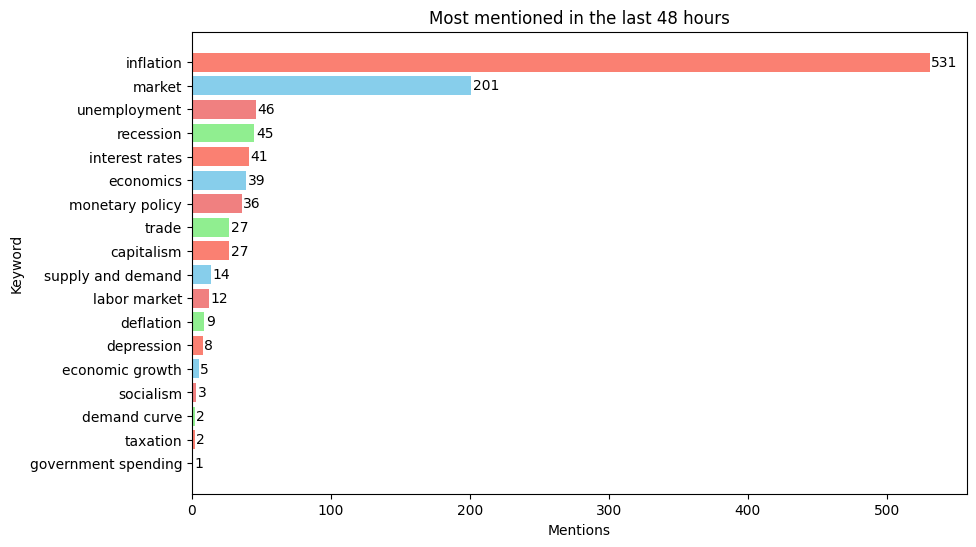

{'economics': 0, 'supply and demand': 1, 'inflation': 2, 'deflation': 3, 'monetary policy': 4, 'fiscal policy': 5, 'gross domestic product (gdp)': 6, 'market': 7, 'trade': 8, 'unemployment': 9, 'interest rates': 10, 'exchange rates': 11, 'consumer price index (cpi)': 12, 'producer price index (ppi)': 13, 'balance of trade': 14, 'gross national product (gnp)': 15, 'recession': 16, 'depression': 17, 'budget deficit': 18, 'national debt': 19, 'capitalism': 20, 'socialism': 21, 'labor market': 22, 'economic growth': 23, 'economic development': 24, 'taxation': 25, 'government spending': 26, 'public debt': 27, 'demand curve': 28, 'supply curve': 29}
Select one of the above options:2



AuthenticationError: ignored

In [ ]:
my_dict={}
c=0;
for word in economics_keywords:
  my_dict[word]=c
  c=c+1


keyword_df.columns = ["Category","Count"]

keyword_df = keyword_df[keyword_df['Count'] > 0]

# Sort the DataFrame by Count in descending order
keyword_df = keyword_df.sort_values(by='Count', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(keyword_df['Category'], keyword_df['Count'], color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, int(width), va='center')

# Set labels and title
plt.xlabel('Mentions')
plt.ylabel('Keyword')
plt.title('Most mentioned in the last 48 hours')
plt.savefig('/content/sample_data/Figure1.jpg')

# Show the plot
plt.show()
##########################Response Ideation#############################
#print("Select one of the following options:")
print(my_dict)
user_input = input("Select one of the above options:")
try:
    user_integer = int(user_input)
    if(user_integer>=0 and user_integer<=29):
      print("")
except ValueError:
    print("That's not a valid integer.")

definition=[key for key, value in my_dict.items() if value == user_integer]

#print(type(definition[0]))
####################Comment Clustering###################################
import pandas as pd

value_to_group_by =  definition


comments_dict = {}
all_comments=''
for index, row in df.iterrows():
    key = row['associated_keywords']
    comment = row['Comment']
    comments_dict.setdefault(key, []).append(comment)

#print((comments_dict))

for i in comments_dict.keys():
  if definition[0]==i:
      grouped_comments = comments_dict[value_to_group_by[0]]
      #print("Comments for", value_to_group_by)
      for comment in grouped_comments:
          all_comments = ' ' + comment
          #print(all_comments)
  else:
    print("Value not found in the dataset:", value_to_group_by[0])



#print(all_comments)


#print('')
#########################################################################


if(concatenated_text):
  prompt = "Give me a definition for"+""+definition[0]+". Also find the overall sentiment and summary of the following grouped community views"+all_comments+". Also find the overall sentiment and summary of the following news articles"+concatenated_text
else:
  prompt = "Give me a definition for"+""+definition[0]+". Also find the overall sentiment and summary of the following grouped community views"+all_comments+". Also find the overall sentiment and summary of past public news about this"

response = get_completion(prompt)

print(response)


while(prompt):
    user_input=input("Ask something else about economics")
    prompt = str(user_input)
    response = get_completion(prompt)

    print(response)




